## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Reading Data

In [2]:
df = pd.read_csv('cubic_zirconia.csv')
data_dict = pd.read_excel('Data Dictionary.xlsx')

### Get to know the features

In [3]:
#this is showing descriprion of variables of the dataset
for i in range(data_dict.shape[0]):
    v_n = data_dict['Variable Name'][i]
    desc = data_dict['Description'][i]
    print(f'{v_n} : {desc}')
    print('-'*50)

Carat :  Carat weight of the cubic zirconia.
--------------------------------------------------
Cut :  Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.
--------------------------------------------------
Color  :  Colour of the cubic zirconia.With D being the best and J the worst.
--------------------------------------------------
Clarity :  cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
--------------------------------------------------
Depth :  The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
--------------------------------------------------
Table :  The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
--------------------------------------------------
Price :  the Price of

In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


## Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


1. Column 'Unnamed : 0' is not important.
2. 'depth' column has some null values.

In [6]:
print('Total null values in depth column : ',df['depth'].isnull().sum())

Total null values in depth column :  697


In [7]:
#dropping 'unnamed :0 ' column
df = df.drop('Unnamed: 0', axis = 1)

### Pair Plot

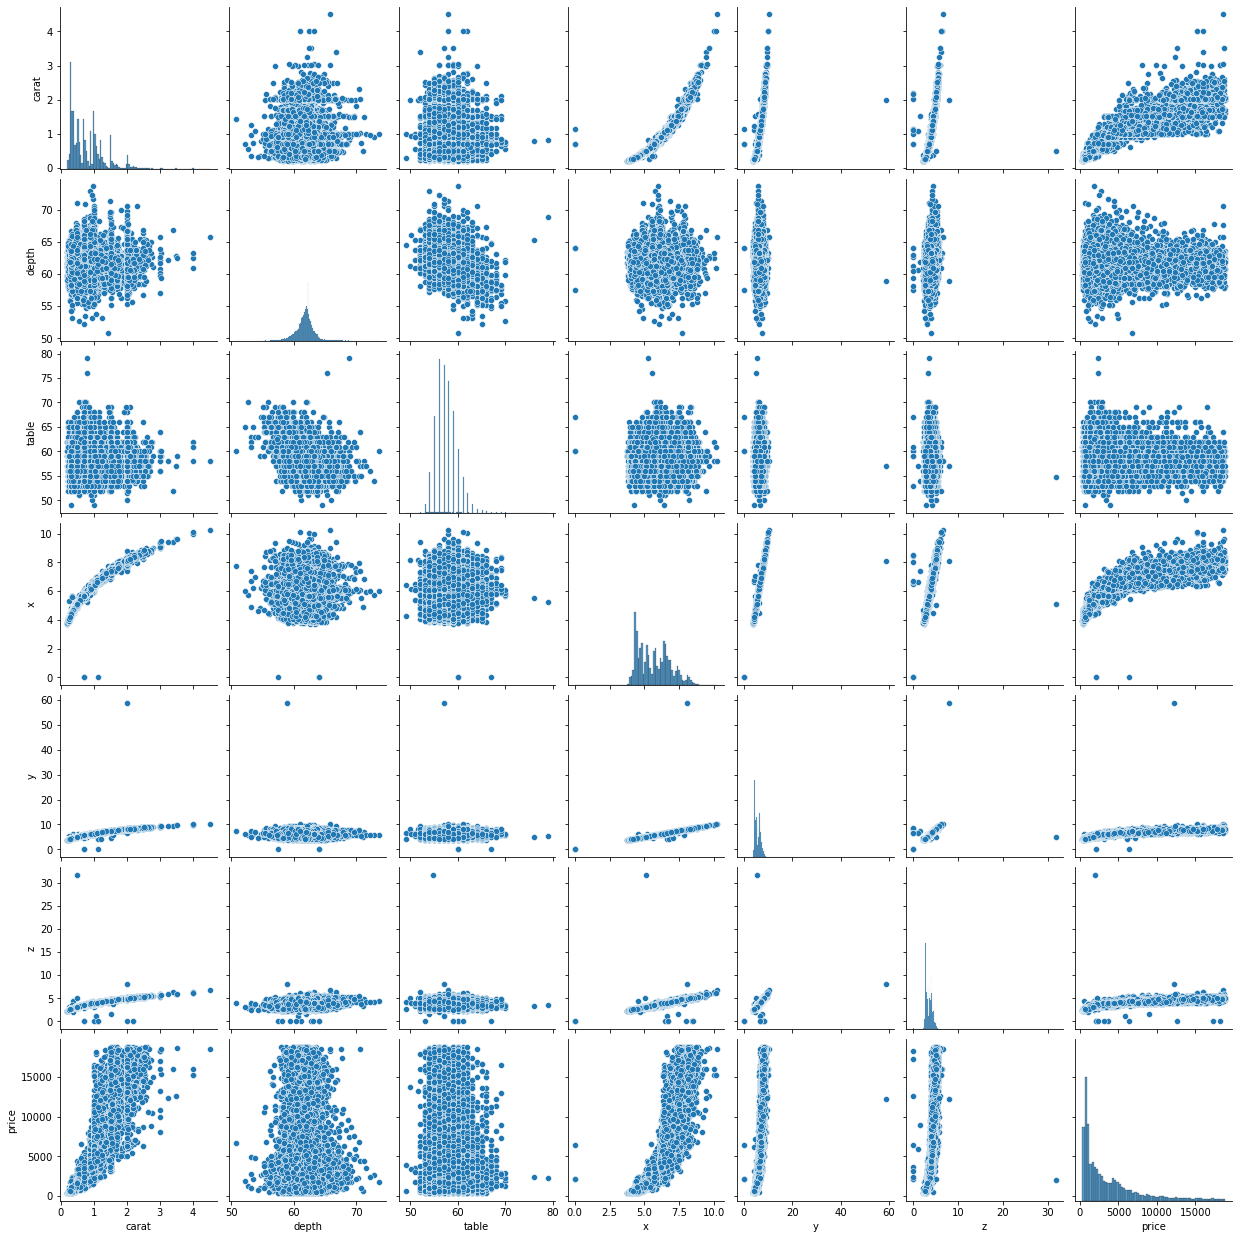

In [8]:
sns.pairplot(df)
plt.show()

From above plot we can infer :

1. Their is strong positive correlation between carat weight and cubic length.
2. Their is correlation in y(width) and z(height), z(height) and x(length).
3. Every zirconium has height less than 10 mm, their is one otlier.
4. Depth has almost normal distribution.
5. Table has right skewed normal distribution.
6. Price is following Pareto distribution.

### Find Categorical Data

In [9]:
df.nunique()

carat       257
cut           5
color         7
clarity       8
depth       169
table       112
x           531
y           526
z           356
price      8742
dtype: int64

From unique value counts and pair plot we can say:
    
    1. Categorical Features: ['cut', 'color', 'clarity']
    2. Numerical Features  : ['carat', 'depth', 'table', 'x', 'y','z','price']

## Distribution Plots of Numerical Features

In [10]:
cat_feat = ['cut', 'color', 'clarity']
num_feat = ['carat', 'depth', 'table', 'x', 'y','z','price']

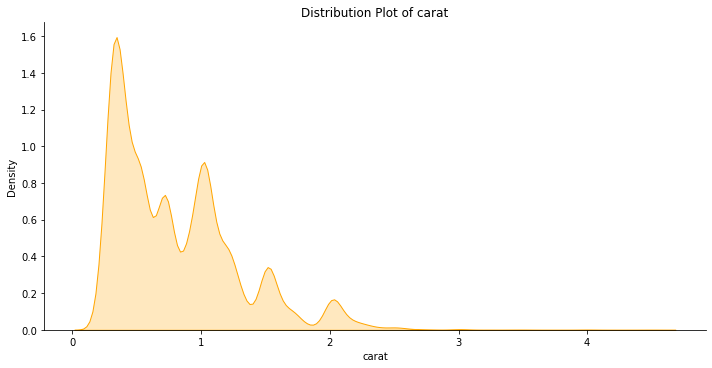

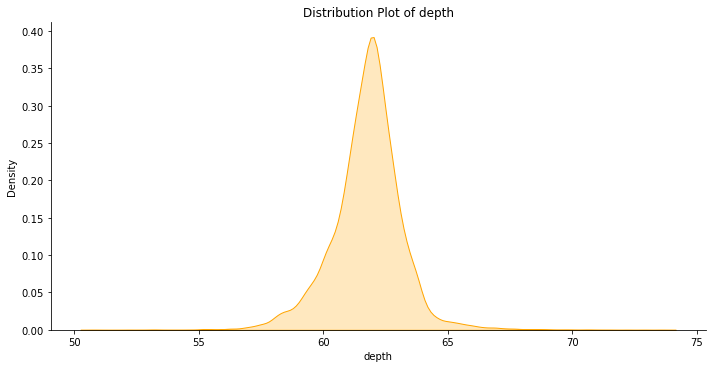

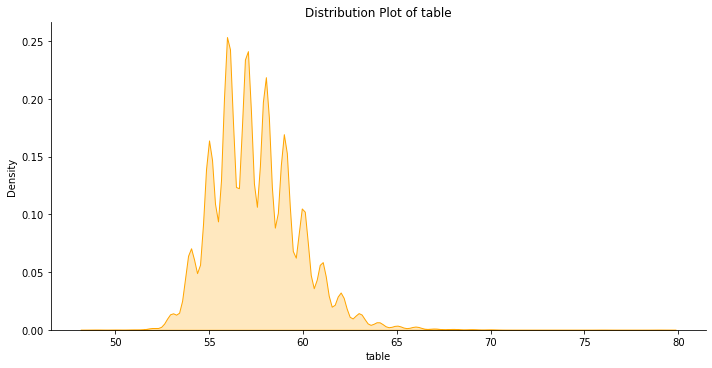

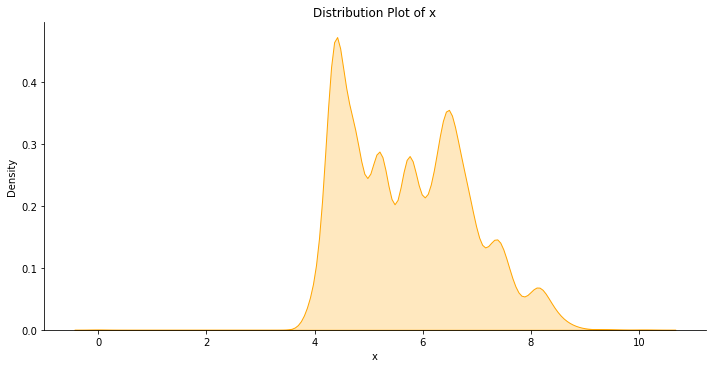

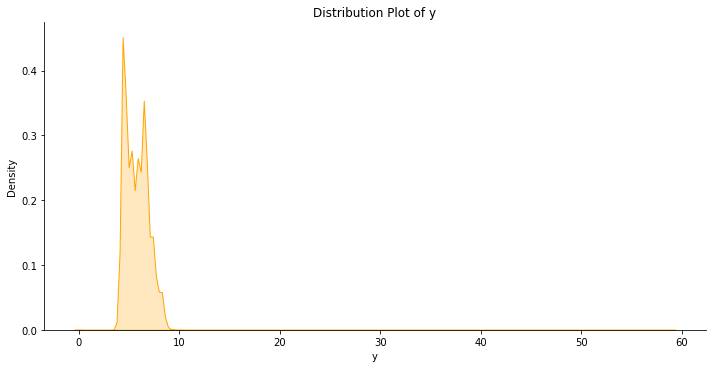

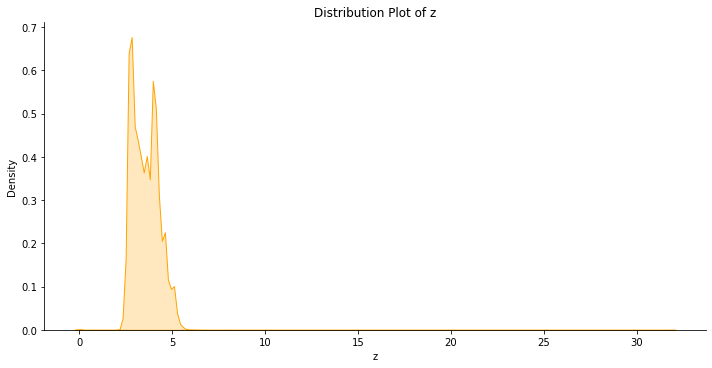

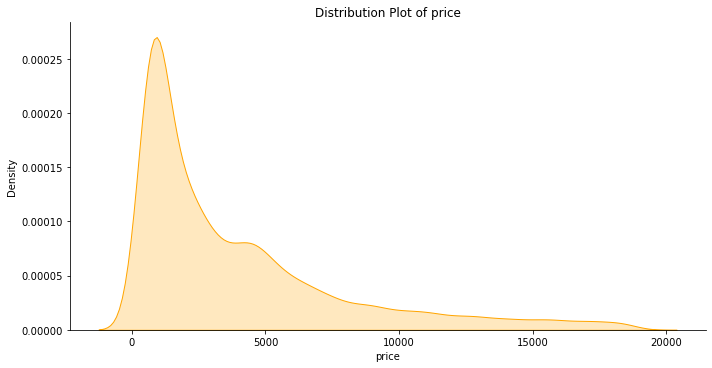

In [11]:
for i in num_feat:
    sns.displot(data = df, x = i, kind = 'kde', aspect = 2, color = 'orange', fill = True)
    plt.title(f'Distribution Plot of {i}')
    plt.show()

1. 'Depth' has normal distribution with high kurtosis
2. Carat can be converted to categorical feature and by diving into intervals.
3. Price column, as we said earlier most of the gems have price in lesser range, that is less than 5k.

For more clarification let's plot CDF plot

### CDF Plot

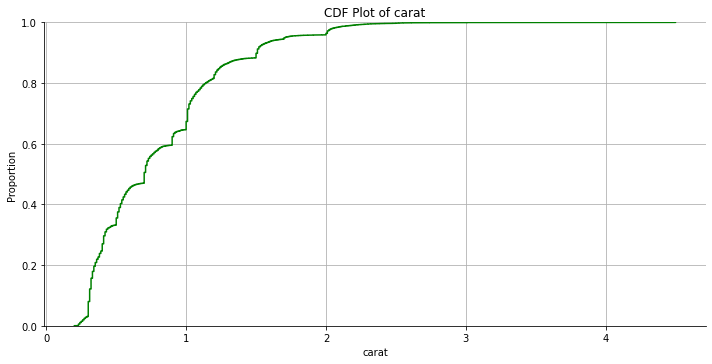

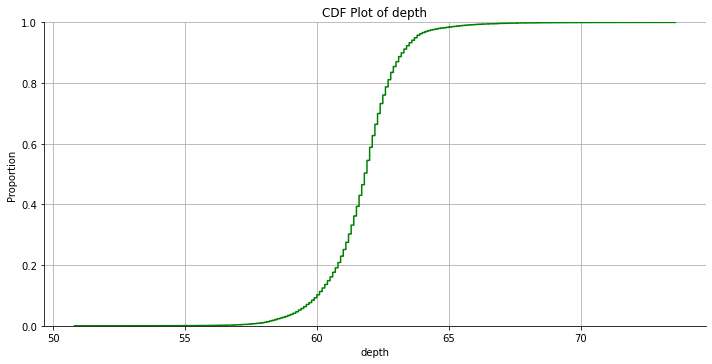

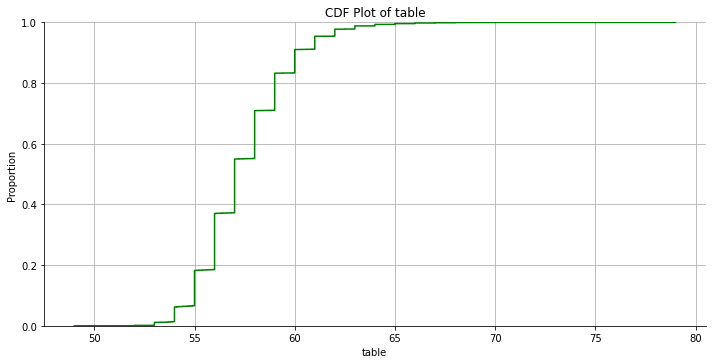

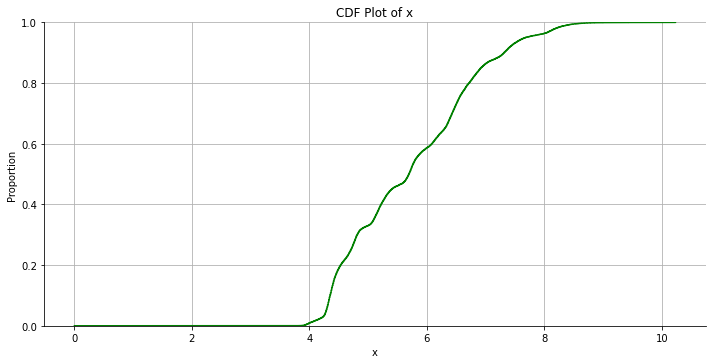

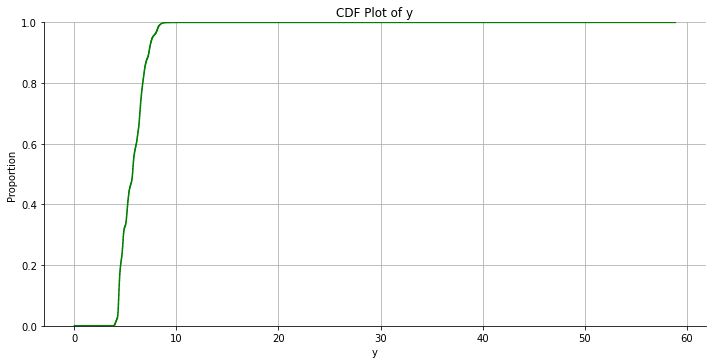

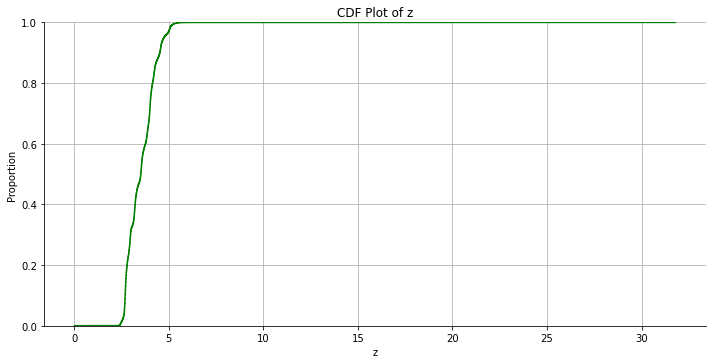

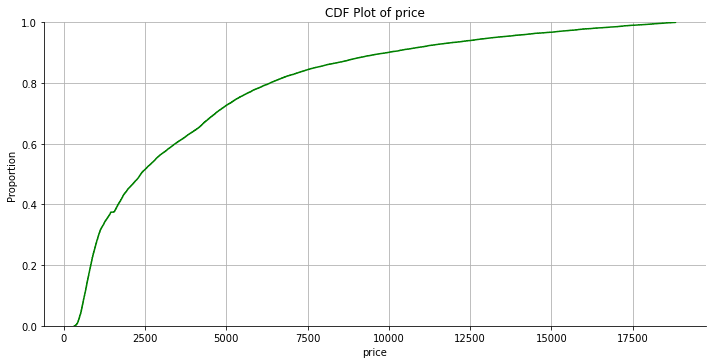

In [12]:
for i in num_feat:
    sns.displot(data = df, x = i, kind = 'ecdf', aspect = 2, color = 'green')
    plt.title(f'CDF Plot of {i}')
    plt.grid()
    plt.show()

1. 70% of gems have price less than 5k and  90% of gems have price less than 10k.
2. 99% of gem have z(height)  less than 5mm.
3. Around 95% of gems have x(length) less than 8mm and more than 4mm.

### BOX PLOT 

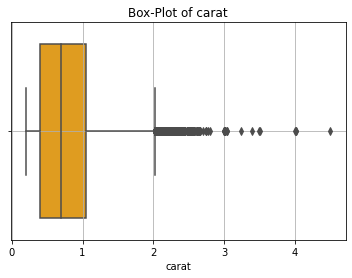

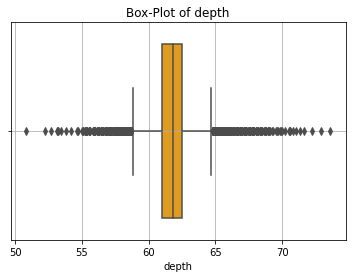

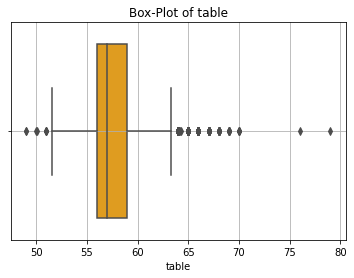

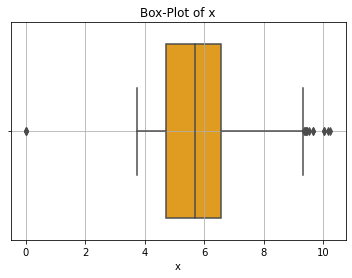

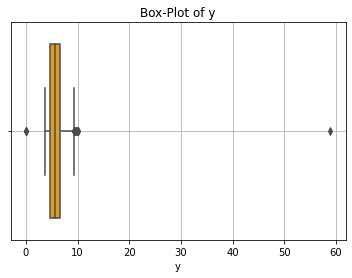

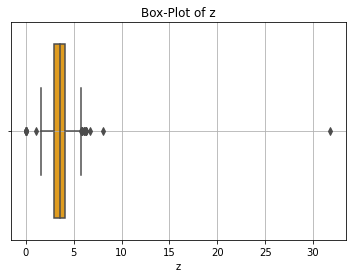

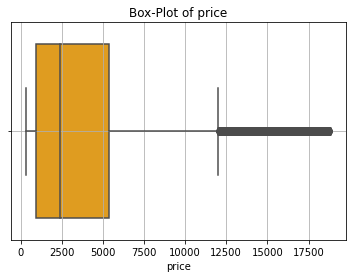

In [13]:
for i in num_feat:
    sns.boxplot(data = df, x = i, color = 'orange')
    plt.title(f'Box-Plot of {i}')
    plt.grid()
    plt.show()

1. All variables have outliers in them, need to be cleaned before modelling.
2. y(width) have range of 0 to 10 mm
3. Also,75% of gems have carata weight less than or equal to 1.

## Count Plot for Categorical Data

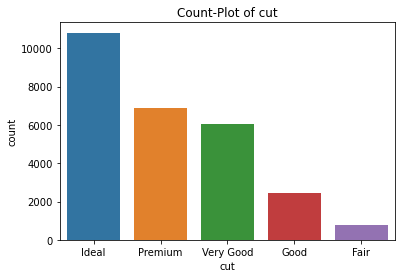

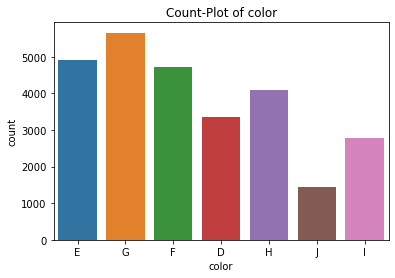

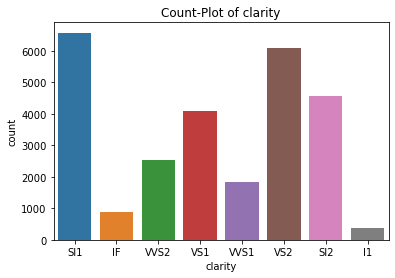

In [14]:
for i in cat_feat:
    
    sns.countplot(data = df, x = i)
    plt.title(f'Count-Plot of {i}')
    plt.show()

No feature  has uniform counts of categories

### Strip Plots 

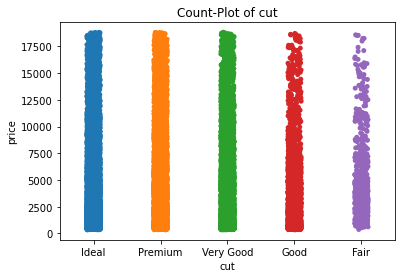

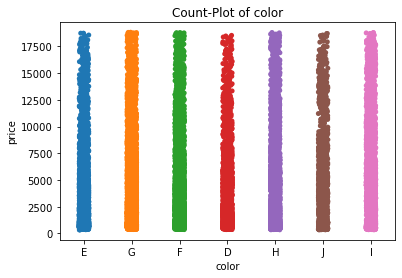

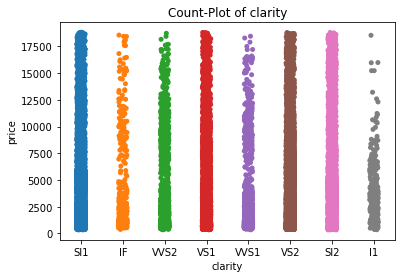

In [15]:
for i in cat_feat:
    
    sns.stripplot(x=i, y="price", data=df)
    plt.title(f'Count-Plot of {i}')
    plt.show()

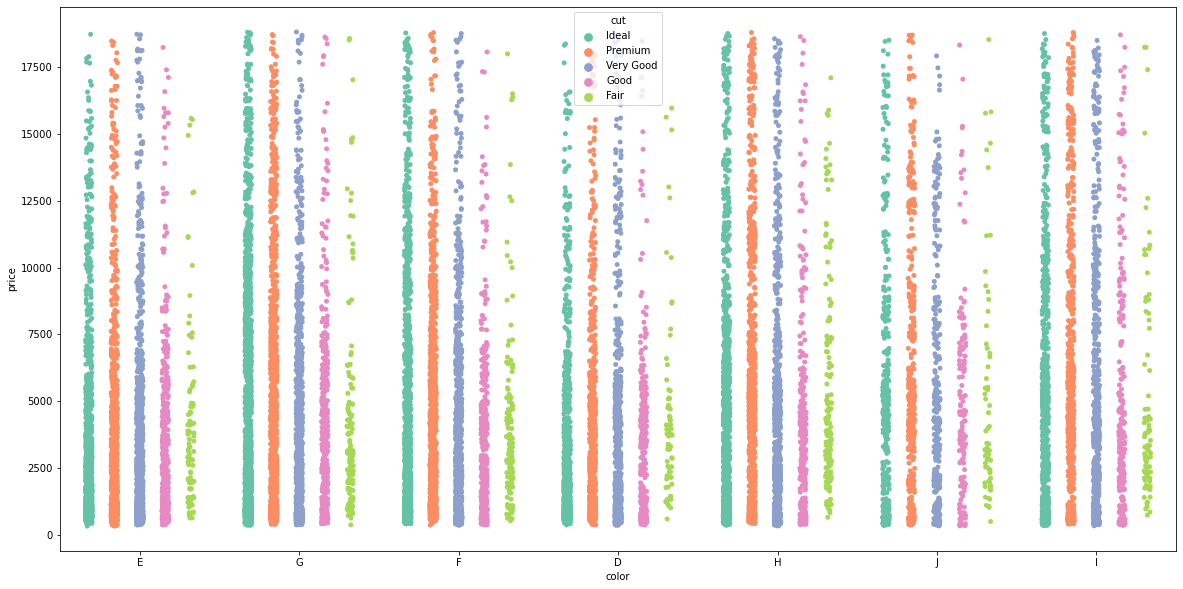

In [16]:
plt.figure(figsize = (20,10))
sns.stripplot(x="color", y="price", hue="cut",
                   data=df, palette="Set2", dodge=True)
plt.show()

1. Fair cut has lower prices, as the name suggests
2. H color gem have more prices compared to other colors.

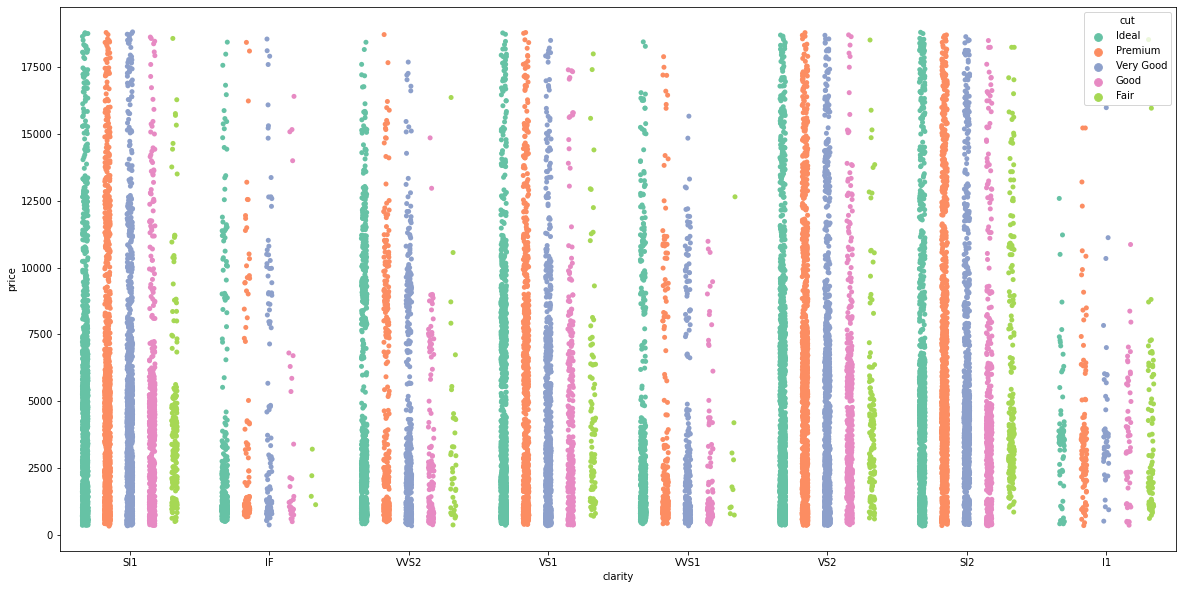

In [17]:
plt.figure(figsize = (20,10))
sns.stripplot(x="clarity", y="price", hue="cut",
                   data=df, palette="Set2", dodge=True)
plt.show()

1. SI 2 clarity gem tends to have more price than other clarity.
2. IF clarity and Fair cut has tendency to have lesser price

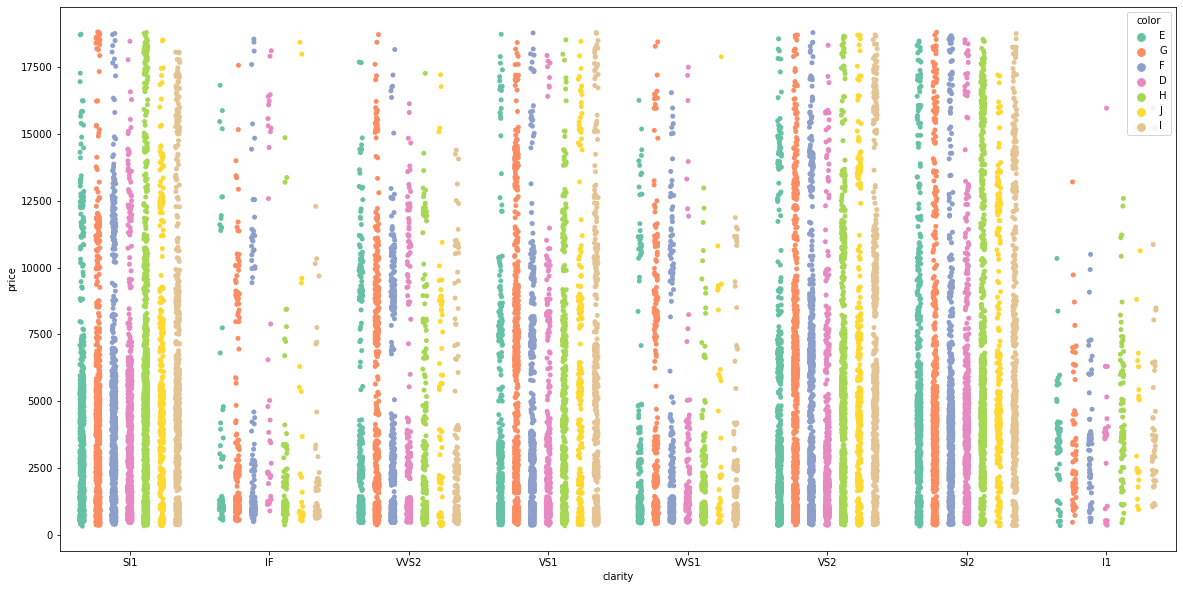

In [18]:
plt.figure(figsize = (20,10))
sns.stripplot(x="clarity", y="price", hue="color",
                   data=df, palette="Set2", dodge=True)
plt.show()

1. IF and l1 clarity have lesser price for each color. 
2. SI2 clarity with H color have higher prices compared to other combinations

## Correlation Between Features as well as with target feature

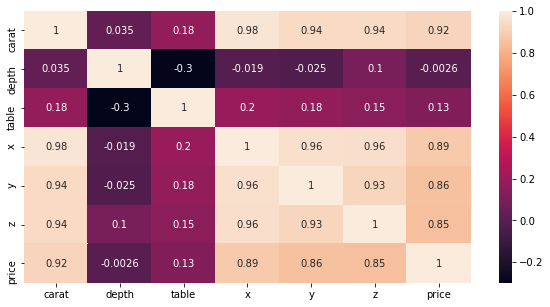

In [19]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True)
plt.show()

1. Price has high correlation with each feature other than depth and table.
2. Other than table and depth other variables have high correlation among them.

# Thank You